> This is a self-correcting activity generated by [nbgrader](https://nbgrader.readthedocs.io). Fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`. Run subsequent cells to check your code.

---

# Classify common images

In this activity, you'll train models to associate images representing common objects with their class.

The [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset consists of 60,000 32x32 colour images in 10 classes, with 6,000 images per class. The classes are completely mutually exclusive. There are 50,000 training images and 10,000 test images.

![CIFAR10 images](images/cifar10.png)

## Package setup

In [1]:
# Import base packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Setup plots
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8
%config InlineBackend.figure_format = 'retina'
sns.set()

In [18]:
# Import ML packages (edit this list if needed)
import tensorflow as tf
print(f'TensorFlow version: {tf.__version__}')
print(f'Keras version: {tf.keras.__version__}')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

TensorFlow version: 2.3.0
Keras version: 2.4.0


## Utility functions

In [4]:
def plot_loss_acc(history):
    """Plot training and (optionally) validation loss and accuracy"""

    loss = history.history['loss']
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(10, 10))

    plt.subplot(2, 1, 1)
    plt.plot(epochs, loss, '.--', label='Training loss')
    final_loss = loss[-1]
    title = 'Training loss: {:.4f}'.format(final_loss)
    plt.ylabel('Loss')
    if 'val_loss' in history.history:
        val_loss = history.history['val_loss']
        plt.plot(epochs, val_loss, 'o-', label='Validation loss')
        final_val_loss = val_loss[-1]
        title += ', Validation loss: {:.4f}'.format(final_val_loss)
    plt.title(title)
    plt.legend()

    acc = history.history['accuracy']

    plt.subplot(2, 1, 2)
    plt.plot(epochs, acc, '.--', label='Training acc')
    final_acc = acc[-1]
    title = 'Training accuracy: {:.2f}%'.format(final_acc * 100)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    if 'val_accuracy' in history.history:
        val_acc = history.history['val_accuracy']
        plt.plot(epochs, val_acc, 'o-', label='Validation acc')
        final_val_acc = val_acc[-1]
        title += ', Validation accuracy: {:.2f}%'.format(final_val_acc * 100)
    plt.title(title)
    plt.legend()

## Step 1: Loading the data

### Question

* Load the CIFAR10 dataset included with Keras.
* Display the first 30 test images.

In [5]:
# Load the data

# YOUR CODE HERE
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

print(f'Training images: {train_images.shape}. Training labels: {train_labels.shape}')
print(f'Training labels: {train_labels}')

170500096/170498071 [==============================] - 11s 0us/step
Training images: (50000, 32, 32, 3). Training labels: (50000, 1)
Training labels: [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


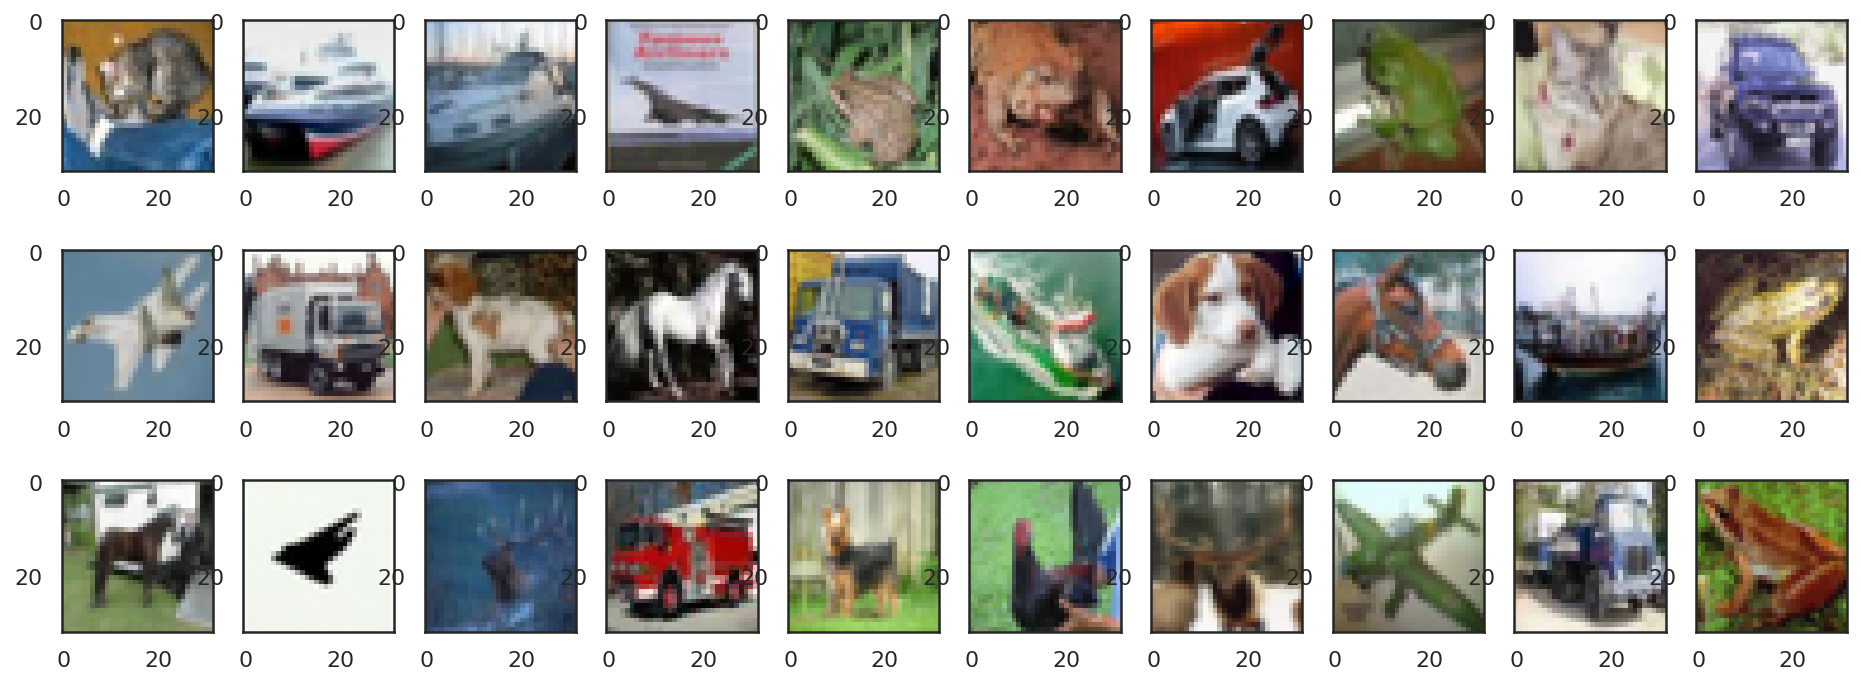

In [6]:
# Plot the first 30 images

# YOUR CODE HERE
with sns.axes_style('white'):
    plt.figure(figsize=(16, 6))
    for i in range(30):
        image = test_images[i]
        fig = plt.subplot(3, 10, i + 1)
        plt.imshow(image, cmap=plt.cm.binary)

## Step 2: Training a dense neural network

### Question

* Prepare data for training with a dense network.
* Train a model on the data to obtain the expected validation accuracy. Use 20% of the training set for validation. Store the training history in a variable named `history`.

In [7]:
# Prepare data for training

# YOUR CODE HERE
x_train, x_test = train_images / 255, test_images / 255
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
print(x_train.shape)
print(y_train)

(50000, 32, 32, 3)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [8]:
# Create and train a model

# YOUR CODE HERE
model = Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(512, "relu"),
    Dense(10, "softmax")
])
model.compile("adam", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=512, epochs=20, validation_split=0.2)

Epoch 1/20
79/79 [==============================] - 1s 13ms/step - loss: 2.3016 - accuracy: 0.2502 - val_loss: 1.9454 - val_accuracy: 0.3103
Epoch 2/20
79/79 [==============================] - 1s 10ms/step - loss: 1.8837 - accuracy: 0.3364 - val_loss: 1.8643 - val_accuracy: 0.3392
Epoch 3/20
79/79 [==============================] - 1s 10ms/step - loss: 1.7949 - accuracy: 0.3729 - val_loss: 1.7869 - val_accuracy: 0.3745
Epoch 4/20
79/79 [==============================] - 1s 10ms/step - loss: 1.7326 - accuracy: 0.3976 - val_loss: 1.7728 - val_accuracy: 0.3798
Epoch 5/20
79/79 [==============================] - 1s 10ms/step - loss: 1.6755 - accuracy: 0.4179 - val_loss: 1.7674 - val_accuracy: 0.3635
Epoch 6/20
79/79 [==============================] - 1s 10ms/step - loss: 1.6574 - accuracy: 0.4201 - val_loss: 1.6617 - val_accuracy: 0.4206
Epoch 7/20
79/79 [==============================] - 1s 10ms/step - loss: 1.6074 - accuracy: 0.4407 - val_loss: 1.6413 - val_accuracy: 0.4261
Epoch 8/20
79

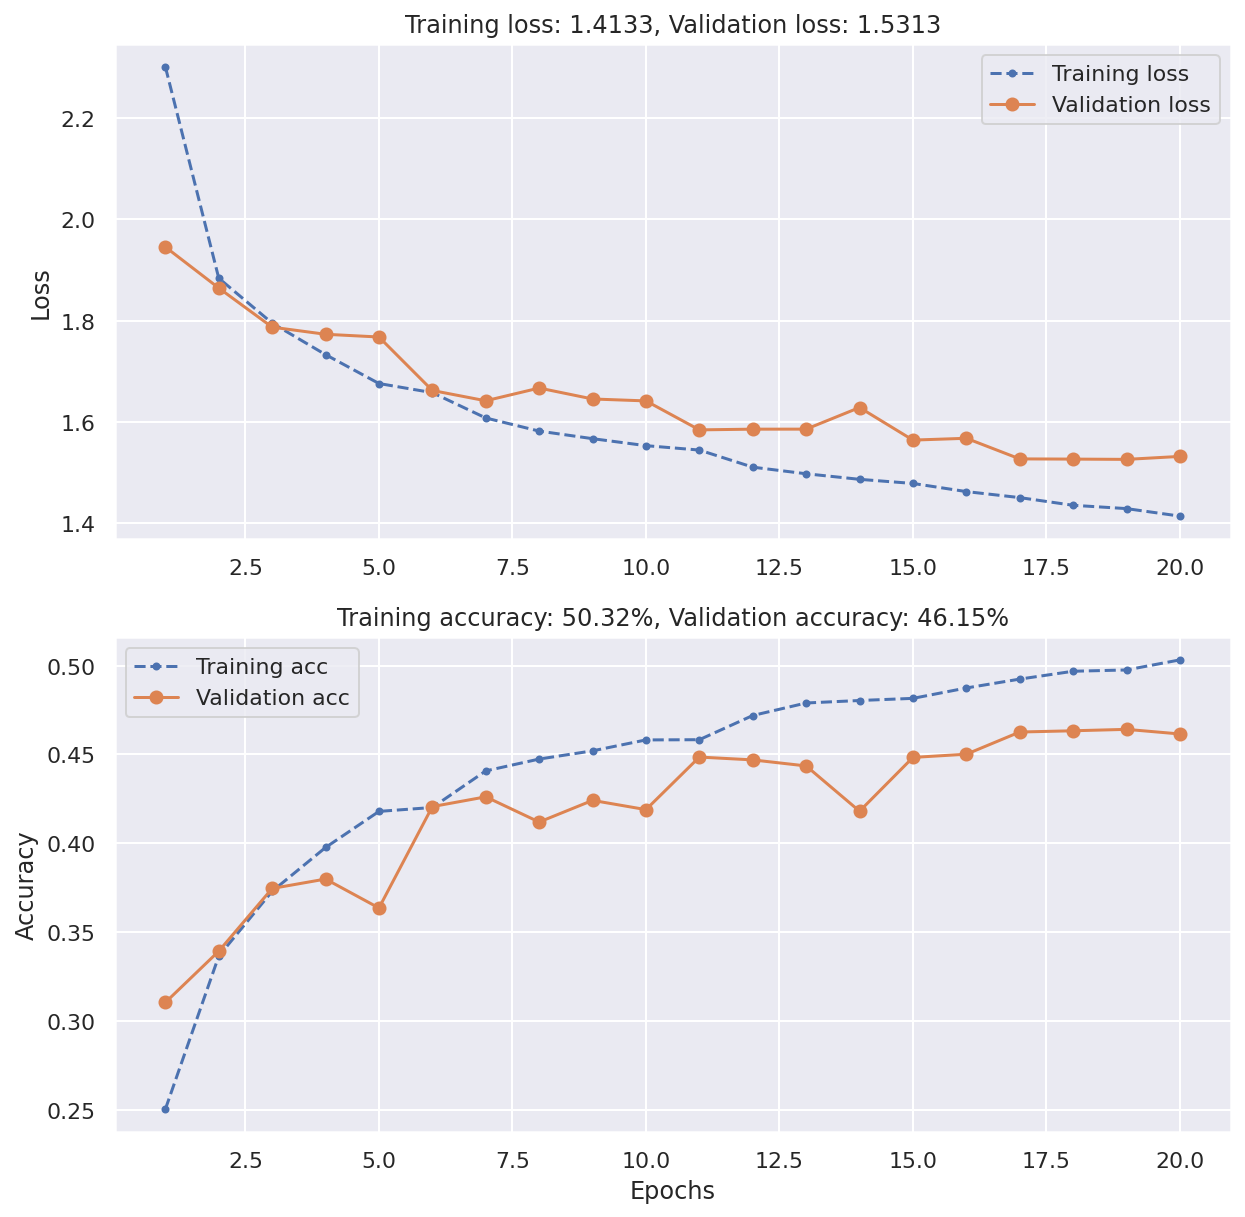

In [9]:
# Plot training history
plot_loss_acc(history)

In [10]:
# Retrieve final validation accuracy
val_acc = history.history['val_accuracy'][-1]

# Assert final accuracy
assert val_acc > 0.45

In [11]:
# Evaluate model performance on test data
_, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f'Test accuracy: {test_acc * 100:.2f}%')

Test accuracy: 47.07%


## Step 3: Training a convnet

### Question

Train a model on the data to obtain the expected validation accuracy. Store the training history in a variable named `history`.

In [20]:
# Create a convnet

# YOUR CODE HERE
model = Sequential([
    Conv2D(32, (3, 3), activation='relu',input_shape=x_train.shape[1:]),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, "relu"),
    Dropout(0.5),
    Dense(10, "softmax")
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               1180160   
_________________________________________________________________
dropout (Dropout)            (None, 512)              

In [21]:
# Train the convnet

# YOUR CODE HERE
model.compile("adam", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=512, epochs=20, validation_split=0.2)

Epoch 1/20
79/79 [==============================] - 2s 31ms/step - loss: 1.7507 - accuracy: 0.3677 - val_loss: 1.4699 - val_accuracy: 0.4841
Epoch 2/20
79/79 [==============================] - 2s 27ms/step - loss: 1.4063 - accuracy: 0.4951 - val_loss: 1.3020 - val_accuracy: 0.5408
Epoch 3/20
79/79 [==============================] - 2s 26ms/step - loss: 1.2647 - accuracy: 0.5497 - val_loss: 1.2113 - val_accuracy: 0.5694
Epoch 4/20
79/79 [==============================] - 2s 26ms/step - loss: 1.1735 - accuracy: 0.5844 - val_loss: 1.1705 - val_accuracy: 0.5833
Epoch 5/20
79/79 [==============================] - 2s 26ms/step - loss: 1.1060 - accuracy: 0.6102 - val_loss: 1.0640 - val_accuracy: 0.6275
Epoch 6/20
79/79 [==============================] - 2s 26ms/step - loss: 1.0419 - accuracy: 0.6342 - val_loss: 1.0449 - val_accuracy: 0.6361
Epoch 7/20
79/79 [==============================] - 2s 26ms/step - loss: 0.9993 - accuracy: 0.6500 - val_loss: 1.0128 - val_accuracy: 0.6496
Epoch 8/20
79

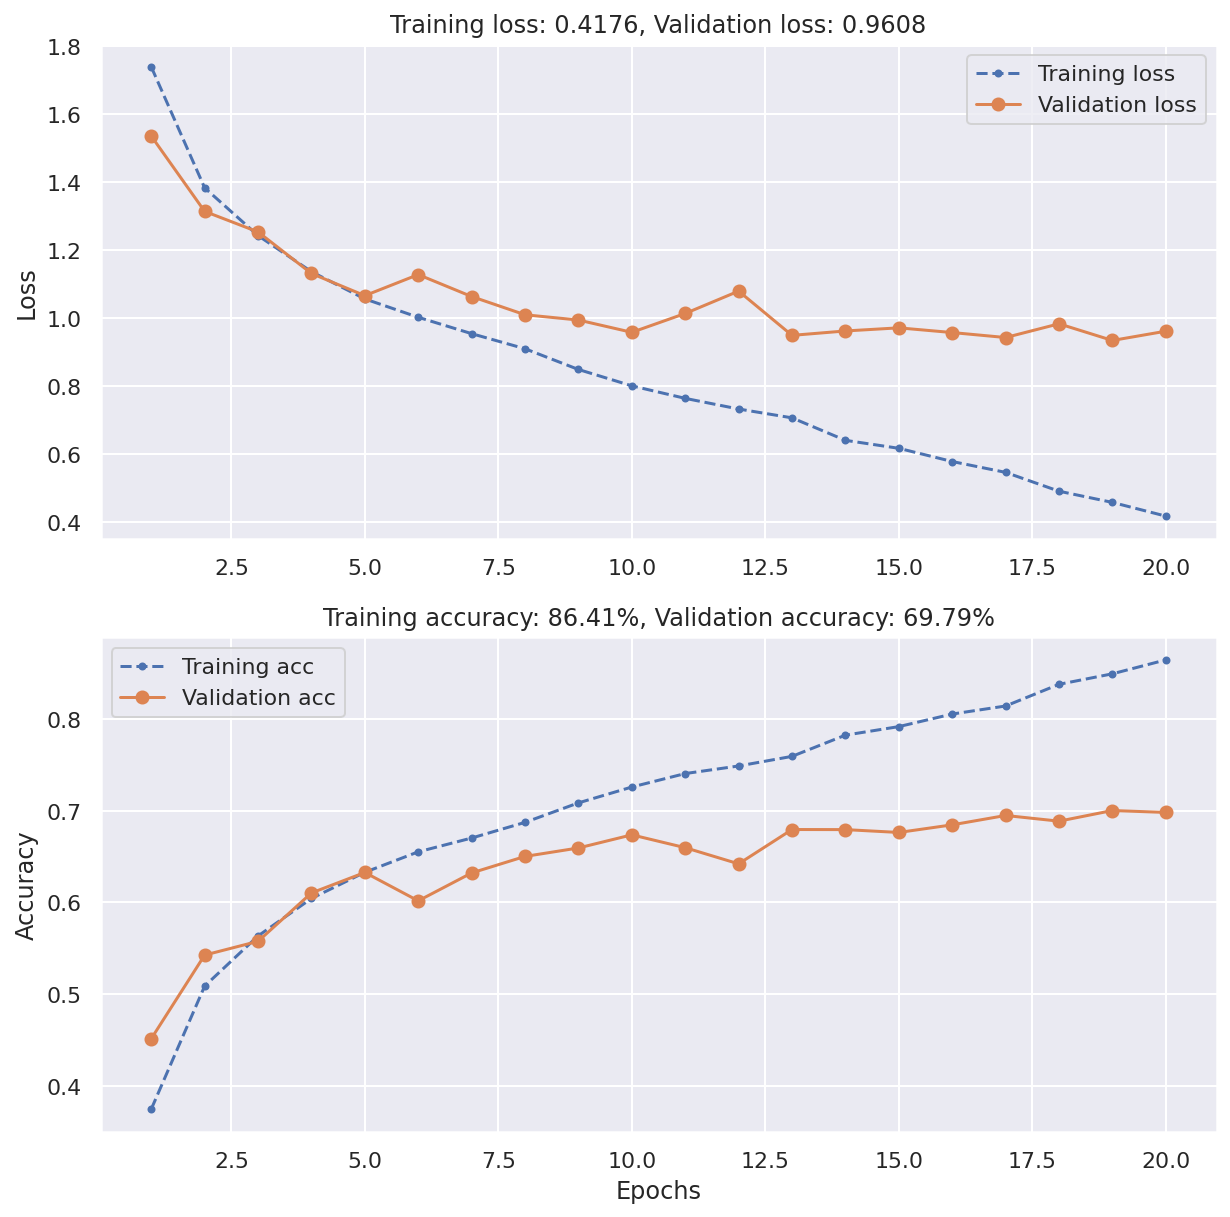

In [15]:
# Plot training history
plot_loss_acc(history)

In [16]:
# Retrieve final validation accuracy
val_acc = history.history['val_accuracy'][-1]

# Assert final validation accuracy
assert val_acc > 0.66

In [17]:
# Evaluate model performance on test data
_, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f'Test accuracy: {test_acc * 100:.2f}%')

Test accuracy: 69.00%
